<a href="https://colab.research.google.com/github/shivankgarg98/AE630-control-codes/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [0]:
def unhat(A):
  return np.array([A[2][1], A[0][2], A[1][0]])
def hat(a):
  return np.array([[0, -a[2], a[1]] , [a[2] , 0, -a[0]], [-a[1], a[0], 0]])

In [0]:
def ER(R, Rd):
  return unhat(np.matmul(Rd.T,R)-np.matmul(R.T,Rd))
def EW(R,Rd,w,wd):
  r = np.matmul(Rd,R.T)
  return w - np.matmul(r,wd)

In [0]:
def controller(kr,kw,er,ew):
  return -kr*er-kw*ew

In [0]:
J = 0.001*np.array([[1,2,5],[0.5,6,2],[6,3,2]])
dt = 0.001
cos  = np.cos(np.pi/3)
sin = np.sin(np.pi/3)
R = np.array([[cos,-sin,0],[sin, cos, 0], [0,0,1]])
Rd = np.identity(3)
w = 0.01*np.array([0,0,0])
wd = 0.002*np.array([1,1,1])
kr = 0.08
kw = 0.02

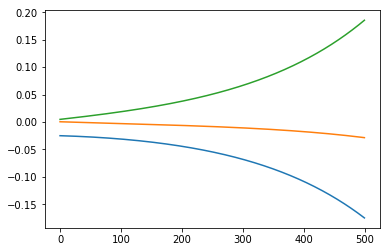

In [59]:
data1 =[]
data2 = []
data3 = []

for i in range(500):
  Mnew = controller(kr,kw,ER(R,Rd),EW(R,Rd,w,wd))
  wnew = w + np.matmul(np.linalg.inv(J), Mnew- np.cross(w,np.matmul(J,w)))*dt
  Rnew = R*expm(hat(wnew)*dt)
  R = Rnew
  M = Mnew
  w = wnew
#   print(Rnew)
  data1.append(wnew[0])
  data2.append(wnew[1])
  data3.append(wnew[2])
plt.plot(range(len(data1)), data1)
plt.plot(range(len(data2)), data2)
plt.plot(range(len(data3)), data3)
plt.show()
  